In [3]:
import tensorflow as tf
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from sklearn.model_selection import train_test_split


In [7]:
data = pd.read_csv("house.csv")


In [8]:
data.mean()

Main I                          964.244104
AC                             1294.230781
Living Rm                        98.322240
Lights living / bath / baby      14.045172
Bath plgs                         0.647835
Holiday                           5.106801
(unnamed II - A)               1138.867191
Fridge                           69.483670
Kitchn / dining  Lts            124.419354
Furnace                         157.670275
Microwave                        20.570049
Guest                           167.172483
test                             58.445940
Guest bath                       38.858554
Mini Fridge/Dshwshr              44.197077
Other                            60.724647
use                            2103.111295
mains                          2103.111295
solar                             0.000000
dtype: float64

In [9]:
data.cov()
data.corr()

,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Holiday,(unnamed II - A),Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,solar
Main I,1.000000,0.960432,0.146518,-0.022970,0.007771,-0.176585,0.945739,0.108399,0.241870,0.925390,0.313216,0.812701,0.036391,0.067716,0.031121,0.703261,0.986307,0.986307,NaN
AC,0.960432,1.000000,0.030761,-0.095350,-0.006366,-0.263080,0.953718,0.017145,0.158902,0.969404,0.220044,0.645544,0.058478,0.007686,0.040974,0.716202,0.970324,0.970324,NaN
Living Rm,0.146518,0.030761,1.000000,0.231879,-0.021888,0.103607,0.161918,0.194654,0.303917,0.072510,0.278217,0.044264,-0.092286,0.126816,0.202208,0.315436,0.156364,0.156364,NaN
Lights living / bath / baby,-0.022970,-0.095350,0.231879,1.000000,0.038260,0.029092,-0.010143,0.353340,0.177664,-0.161335,0.147789,-0.056627,0.249589,-0.003564,0.059103,-0.131025,-0.016778,-0.016778,NaN
Bath plgs,0.007771,-0.006366,-0.021888,0.038260,1.000000,-0.042291,-0.001846,0.033854,0.034297,-0.002002,-0.062003,0.009121,-0.010027,-0.023068,-0.020363,-0.046163,0.002997,0.002997,NaN
Holiday,-0.176585,-0.263080,0.103607,0.029092,-0.042291,1.000000,-0.201988,0.137076,0.035654,-0.175860,0.001515,0.020315,-0.373053,0.126121,0.032233,0.068071,-0.191924,-0.191924,NaN
(unnamed II - A),0.945739,0.953718,0.161918,-0.010143,-0.001846,-0.201988,1.000000,0.150542,0.386480,0.922053,0.375721,0.654632,0.039870,0.034880,0.186452,0.770112,0.986376,0.986376,NaN
Fridge,0.108399,0.017145,0.194654,0.353340,0.033854,0.137076,0.150542,1.000000,0.272508,-0.026308,0.202456,0.184241,0.001781,-0.131522,0.009779,0.082679,0.131290,0.131290,NaN
Kitchn / dining Lts,0.241870,0.158902,0.303917,0.177664,0.034297,0.035654,0.386480,0.272508,1.000000,0.116774,0.637671,0.256937,0.042654,0.019291,-0.049687,0.276759,0.318617,0.318617,NaN
Furnace,0.925390,0.969404,0.072510,-0.161335,-0.002002,-0.175860,0.922053,-0.026308,0.116774,1.000000,0.182548,0.603763,-0.023719,0.063553,0.061402,0.749343,0.936511,0.936511,NaN


In [10]:
data.columns

Index(['timestamp', 'Main I', 'AC', 'Living Rm', 'Lights living / bath / baby',
       'Bath plgs', 'Holiday', '(unnamed II - A)', 'Fridge',
       'Kitchn / dining  Lts', 'Furnace', 'Microwave', 'Guest', 'test',
       'Guest bath', 'Mini Fridge/Dshwshr', 'Other', 'use', 'mains', 'solar'],
      dtype='object')

In [13]:
data.describe()

,Main I,AC,Living Rm,Lights living / bath / baby,Bath plgs,Holiday,(unnamed II - A),Fridge,Kitchn / dining Lts,Furnace,Microwave,Guest,test,Guest bath,Mini Fridge/Dshwshr,Other,use,mains,solar
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.0
mean,964.244104,1294.230781,98.322240,14.045172,0.647835,5.106801,1138.867191,69.483670,124.419354,157.670275,20.570049,167.172483,58.445940,38.858554,44.197077,60.724647,2103.111295,2103.111295,0.0
std,524.992535,768.943371,48.902894,24.207122,5.465027,1.534173,526.301201,39.434616,106.824288,80.984795,21.349244,167.957676,216.706801,19.710111,79.757897,28.989292,1036.934705,1036.934705,0.0
min,116.985379,0.000000,43.893672,0.000000,0.000000,0.000000,116.235472,0.000000,22.245735,0.000000,5.434791,0.000000,0.000000,0.000000,5.380025,0.000000,233.220851,233.220851,0.0
25%,533.616473,724.021110,94.736970,0.000000,0.000000,5.191597,694.121237,39.539463,27.700154,109.415789,6.643162,21.656497,0.000000,27.715296,26.865946,39.607571,1223.550995,1223.550995,0.0
50%,940.759510,1320.002024,99.188996,0.000000,0.000000,5.503162,1149.365530,58.123969,70.711303,158.044244,9.297530,125.018424,0.000000,35.678307,28.978511,56.983582,2021.050453,2021.050453,0.0
75%,1436.621984,2092.175354,100.225450,14.449795,0.000000,5.754218,1643.145116,93.528435,242.548540,236.374119,28.585743,262.549052,11.451258,48.369775,31.741384,85.175633,3074.690338,3074.690338,0.0
max,2160.018209,2199.240366,411.524924,90.943929,60.041136,6.366651,1950.193466,199.091234,325.853324,244.190165,99.203332,909.042450,943.106552,124.596468,701.906377,116.633127,3972.839076,3972.839076,0.0


In [14]:
ac_data = data['AC']
timestamp_data = data['timestamp']

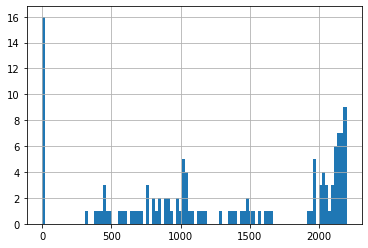

In [15]:
ac_data.hist(bins=100)

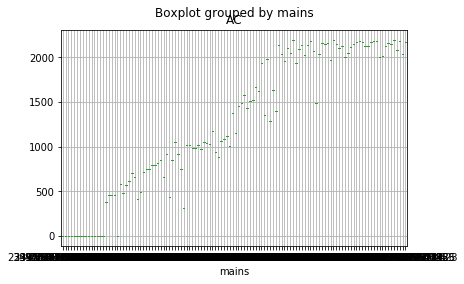

In [16]:
data.boxplot(column='AC',by='mains')

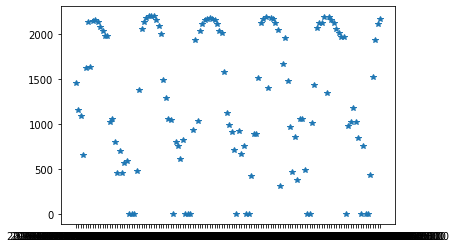

In [17]:
plt.plot(timestamp_data,ac_data,'*')


In [18]:
row_count=data.shape[0]
row_count #126


126

In [27]:
#Splitting the training data and test data
training_data,test_data = train_test_split(data,test_size=0.3)


In [29]:
#Training Data
train_ac_data = np.asarray(training_data['AC'])



array([1058.46229855,    0.        , 2054.233951  ,    0.        ,
       2187.48855609,  663.47795549, 2153.99846813, 2198.52832225,
       1019.37801688,  990.63779131,  848.5594031 , 1932.05104272,
       1670.52263744, 2145.36310764,  379.67696026, 2039.67060849,
       2158.51287397, 1350.2510832 ,  456.41203189, 2133.69361041,
        752.14353256, 1090.39487948, 2081.85735829, 2153.17518425,
        797.0257082 ,    0.        , 1020.23881195, 1053.56210347,
          0.        , 1398.44113792,  919.57025129, 1967.64467351,
       2136.30795389,  885.13425957, 2189.38894671, 2182.35379133,
       1020.92026619,  476.90466681,  752.55937586, 2138.96839677,
       1959.62049627,  822.47300979, 1123.93128254, 2172.41893838,
        970.31457657, 2199.24036586, 2118.11335989,    0.        ,
        416.96080631,    0.        , 1452.20495718, 1045.02202675,
       2108.36972643, 1978.33318968,  979.99719641,  751.62061299,
       2199.24036586,    0.        ,  437.77636054, 2158.82273

In [30]:
test_ac_data = np.asarray(test_data['AC'])
test_ac_data



array([ 714.82127565, 2169.60652638, 1436.25472457, 2124.10924171,
       1574.20564093,  585.01786485, 1484.20025645, 2001.75311191,
        458.62987717, 2154.9660217 , 1012.57171845, 2053.88816579,
       1289.75296401, 1626.13989018, 2034.03649716, 2031.27813191,
       1492.61728361, 1519.17092018,  655.75258707,  613.85664599,
       2095.61468604, 1978.33318968, 2168.30174395, 2125.50408772,
       2124.10924171,  315.50344146, 1030.44006863,    0.        ,
       2066.48779572,  487.99725179, 1153.47048282,  851.49404376,
       2125.02926017,    0.        , 2181.37771564, 2164.98380525,
          0.        , 1178.60324342])

In [16]:
def normalize(array):
    return (array - array.mean()) / array.std()


In [17]:
train_ac_data_norm = normalize(train_ac_data)
train_ac_data_norm



array([ 0.42069272, -0.67206804, -1.19395888, -0.33922316, -1.32941987,
        0.87181193, -1.06885309, -0.74795521,  1.16477789, -0.62519934,
       -1.24847378, -1.8583989 , -1.00315266, -0.81121515, -1.27747473,
        0.98334051,  1.16255384,  0.22116696, -1.8583989 ,  0.93051254,
        1.10098332, -0.38371274,  0.20944006,  0.97549087,  1.20565859,
        1.1807404 ,  0.46903083, -0.5545461 ,  1.13059494, -0.40243819,
        1.16437171,  0.02281746,  0.0899575 ,  1.11433659, -0.42275427,
        1.16829006,  1.14397405, -0.06147061, -1.8583989 , -0.8104866 ,
       -0.49303302, -0.21632823,  1.14147899, -1.22250992, -0.93401854,
       -1.21941995,  1.10226512,  0.16486311, -1.8583989 ,  0.94096867,
       -1.21545677,  1.19169568,  1.09262965, -0.58622475,  1.10292667,
        0.40719525, -0.94478179,  1.18928557, -0.39053986,  0.05659807,
       -0.57722193,  1.10098332,  1.20466655,  0.8978831 ,  1.12168561,
       -0.87972289,  1.06128372,  1.20565859, -0.71250115, -1.04

In [18]:
test_ac_data_norm = normalize(test_ac_data)
test_ac_data_norm



array([-1.39790103,  1.00452991,  1.08570054,  0.84823815,  0.88961814,
       -1.39790103,  0.98988199, -0.17511416, -1.39790103, -1.03110708,
       -0.56687326,  1.14741076,  0.97717432, -1.39790103, -0.05691408,
       -0.36887297,  0.36823726, -1.39790103,  1.05322047, -1.39790103,
       -1.39790103, -0.21280558,  1.07408415, -1.39790103,  0.43221882,
       -1.39790103,  0.96359631,  0.85527924, -0.46843896,  0.94143373,
       -1.39790103,  0.88961814,  1.11151525, -0.21101261,  1.11187548,
       -0.09125538,  0.36482219,  1.05294957])